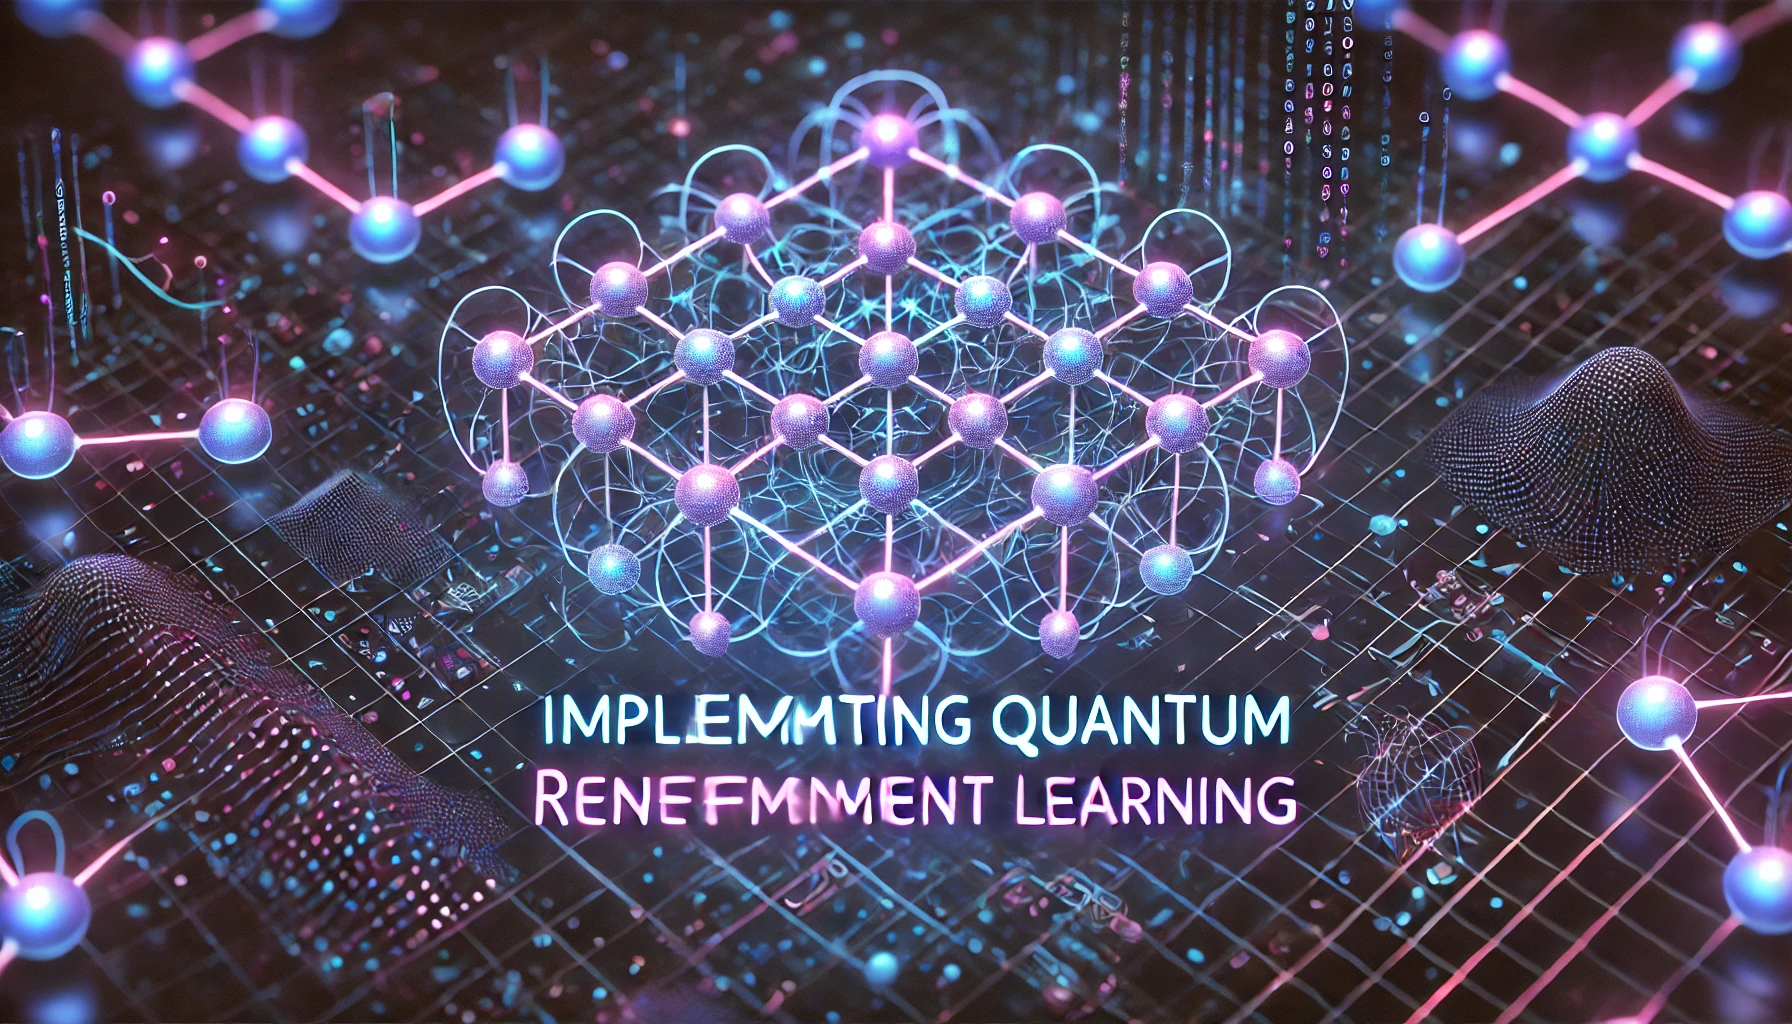

# **Problem Statement:**

Traditional reinforcement learning algorithms often face challenges in terms of scalability and efficiency, especially when dealing with complex environments and large state-action spaces. The computational limits of classical algorithms restrict their ability to quickly converge to optimal policies. Quantum computing, with its potential to perform complex calculations more efficiently, offers a promising avenue to enhance reinforcement learning. This project explores the integration of quantum circuits into a reinforcement learning model to investigate whether quantum computing can accelerate the learning process and improve the agent’s performance.

# **Objectives**

1. **Integration:** Develop a reinforcement learning model that incorporates quantum circuits to process input data and generate Q-values.
2. **Comparison:** Evaluate the performance of the quantum-enhanced reinforcement learning model against a classical counterpart.
3. **Optimization:** Identify whether quantum circuits can reduce the time to convergence or enhance the quality of the learned policy.
4. **Learning Analysis:** Analyze the agent’s learning history to determine the effectiveness of quantum-enhanced learning over multiple episodes.
5. **Scalability:** Assess the scalability of the quantum model in handling larger and more complex environments.

# **Impacts**

1. **Advancement in Quantum Computing:** The project contributes to the growing body of research on quantum machine learning, specifically focusing on reinforcement learning, which is crucial for tasks like decision-making and autonomous systems.
2. **Enhanced Learning Efficiency:** If successful, the integration of quantum circuits could lead to more efficient learning algorithms that require fewer resources and less time to achieve optimal performance.
3. **Broader Applicability:** The findings from this project could be applied to various domains, such as finance, robotics, and artificial intelligence, where faster and more efficient learning models are essential.
4. **Innovation in AI and ML:** This project could pave the way for new hybrid quantum-classical approaches to machine learning, potentially revolutionizing how complex problems are tackled.

# **Approach**

1. **Model Design:** Design a quantum-enhanced reinforcement learning model using TensorFlow and Keras, incorporating custom quantum layers (e.g., ReUploadingPQC).
2. **Implementation:** Implement the model and run a series of episodes where the agent interacts with a simulated environment. The agent’s actions are guided by Q-values generated by the quantum circuit.
3. **Training:** Train the agent by allowing it to explore the environment, collect rewards, and optimize its policy over time.
4. **Evaluation:** Plot the agent’s learning history to analyze its progression, focusing on the rewards collected over episodes and the stability of the learning process.
5. **Comparison:** Compare the performance of the quantum-enhanced model with a classical reinforcement learning model to evaluate any improvements in efficiency or effectiveness.

# Parametrized Quantum Circuits (PQC) for Reinforcement Learning

Quantum computing has demonstrated significant computational advantages in specific problem domains. The emerging field of Quantum Reinforcement Learning (QRL) seeks to leverage these advantages by developing reinforcement learning agents that utilize quantum computational models.

In this tutorial, we will explore the implementation of two reinforcement learning algorithms that are based on parameterized/variational quantum circuits (PQCs or VQCs). Specifically, we will cover a policy-gradient method and a deep Q-learning approach. These algorithms were originally introduced by [[1]Jerbi et al.](https://arxiv.org/abs/2103.05577) and [[2]Skolik et al.](https://arxiv.org/abs/2103.15084), respectively.

In this project, we will implement a parameterized quantum circuit (PQC) with data re-uploading using TensorFlow Quantum (TFQ) and apply it in two distinct reinforcement learning scenarios:

1. As an RL policy trained using a policy-gradient method.
2. As a Q-function approximator trained using deep Q-learning.

Both implementations will be used to solve the [CartPole-v1](http://gym.openai.com/envs/CartPole-v1/) environment, a standard benchmarking task from OpenAI Gym. It is important to note that, as demonstrated by Jerbi et al. [[1]](https://arxiv.org/abs/2103.05577) and Skolik et al. [[2]](https://arxiv.org/abs/2103.15084), these quantum-based agents are also capable of addressing other OpenAI Gym environments, such as [FrozenLake-v0](http://gym.openai.com/envs/FrozenLake-v0/), [MountainCar-v0](http://gym.openai.com/envs/MountainCar-v0/), and [Acrobot-v1](http://gym.openai.com/envs/Acrobot-v1/).

This implementation offers the following key features:

1. **PQC with Data Re-Uploading**: You will learn to utilize the `tfq.layers.ControlledPQC` to implement a parameterized quantum circuit (PQC) with data re-uploading, a technique frequently employed in quantum machine learning (QML) applications. This approach inherently supports the use of trainable scaling parameters at the input of the PQC, thereby enhancing its expressivity.

2. **Trainable Output Observables**: You will gain insights into implementing observables with trainable weights at the output of a PQC. This allows for a flexible range of output values, accommodating various learning tasks.

3. **Custom Training with Gradient Tape**: You will learn how to train a `tf.keras.Model` using non-trivial machine learning loss functions that are not compatible with the standard `model.compile` and `model.fit` methods. This will be achieved using the `tf.GradientTape`, enabling more complex and customized training procedures.

# Initial Setup

Install TensorFlow

In [ ]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

Install TensorFlow Quantum

In [ ]:
!pip install tensorflow-quantum==0.7.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 22.7 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled sympy-1.13.2


Install Gym:

In [ ]:
!pip install gym==0.18.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Now import TensorFlow and the module dependencies:

In [ ]:
# Update package resources to account for version changes.
import importlib, pkg_resources
importlib.reload(pkg_resources)

<module 'pkg_resources' from '/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py'>

In [ ]:
import tensorflow as tf
import tensorflow_quantum as tfq

import gym, cirq, sympy
import numpy as np
from functools import reduce
from collections import deque, defaultdict
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit
tf.get_logger().setLevel('ERROR')

# Build a PQC with Data Re-uploading

At the core of both reinforcement learning (RL) algorithms you will implement is a parameterized quantum circuit (PQC) that receives the agent's state \( s \) from the environment (represented as a NumPy array) as input and produces a vector of expectation values as output. These expectation values are subsequently processed to either generate the agent's policy $\pi(a|s)$ or approximate Q-values $Q(s,a)$. In this manner, the PQCs serve an analogous function to that of deep neural networks in contemporary deep RL algorithms.

A common method for encoding an input vector into a PQC involves using single-qubit rotations, where the rotation angles are determined by the components of the input vector. To achieve a [highly-expressive model](https://arxiv.org/abs/2008.08605), these single-qubit encodings are not applied just once within the PQC but are repeated multiple times in what is known as "[re-uploadings](https://quantum-journal.org/papers/q-2020-02-06-226/)", interspersed with variational gates. The structure of such a PQC is illustrated below.

<img src="https://github.com/tensorflow/quantum/blob/master/docs/tutorials/images/pqc_re-uploading.png?raw=1" width="700">

As outlined in [[1]](https://arxiv.org/abs/2103.05577) and [[2]](https://arxiv.org/abs/2103.15084), a method to further enhance the expressivity and trainability of data re-uploading PQCs involves incorporating trainable input-scaling parameters $ \lambda $ for each encoding gate within the PQC. Additionally, the implementation of trainable observable weights $ w $ at the output of the PQC contributes to the flexibility and effectiveness of the model. These enhancements allow the PQC to adapt more efficiently to the data, improving overall performance in the reinforcement learning tasks.

## Cirq Circuit for Controlled PQC

The initial step involves implementing the quantum circuit in Cirq, which will serve as the PQC. Begin by defining the basic unitary operations to be applied within the circuit. These include an arbitrary single-qubit rotation and an entangling layer composed of controlled-Z (CZ) gates:

- **Single-Qubit Rotation**: This unitary operation will apply arbitrary rotations to individual qubits, allowing for flexible manipulation of the quantum state.
  
- **Entangling Layer**: The CZ gates will create entanglement between qubits, an essential feature for capturing complex correlations within the quantum system.

By establishing these foundational operations, you will be able to construct the PQC necessary for the reinforcement learning algorithms.

In [ ]:
def one_qubit_rotation(qubit, symbols):
    """
    Returns Cirq gates that apply a rotation of the bloch sphere about the X,
    Y and Z axis, specified by the values in `symbols`.
    """
    return [cirq.rx(symbols[0])(qubit),
            cirq.ry(symbols[1])(qubit),
            cirq.rz(symbols[2])(qubit)]

In [ ]:
def entangling_layer(qubits):
    """
    Returns a layer of CZ entangling gates on `qubits` (arranged in a circular topology).
    """
    cz_ops = [cirq.CZ(q0, q1) for q0, q1 in zip(qubits, qubits[1:])]
    cz_ops += ([cirq.CZ(qubits[0], qubits[-1])] if len(qubits) != 2 else [])
    return cz_ops

### Generation of Cirq Circuits

In [ ]:
def generate_circuit(qubits, n_layers):
    """Prepares a data re-uploading circuit on `qubits` with `n_layers` layers."""
    # Number of qubits
    n_qubits = len(qubits)

    # Sympy symbols for variational angles
    params = sympy.symbols(f'theta(0:{3*(n_layers+1)*n_qubits})')
    params = np.asarray(params).reshape((n_layers + 1, n_qubits, 3))

    # Sympy symbols for encoding angles
    inputs = sympy.symbols(f'x(0:{n_layers})'+f'_(0:{n_qubits})')
    inputs = np.asarray(inputs).reshape((n_layers, n_qubits))

    # Define circuit
    circuit = cirq.Circuit()
    for l in range(n_layers):
        # Variational layer
        circuit += cirq.Circuit(one_qubit_rotation(q, params[l, i]) for i, q in enumerate(qubits))
        circuit += entangling_layer(qubits)
        # Encoding layer
        circuit += cirq.Circuit(cirq.rx(inputs[l, i])(q) for i, q in enumerate(qubits))

    # Last varitional layer
    circuit += cirq.Circuit(one_qubit_rotation(q, params[n_layers, i]) for i,q in enumerate(qubits))

    return circuit, list(params.flat), list(inputs.flat)

**Check that this produces a circuit that is alternating between variational and encoding layers.**

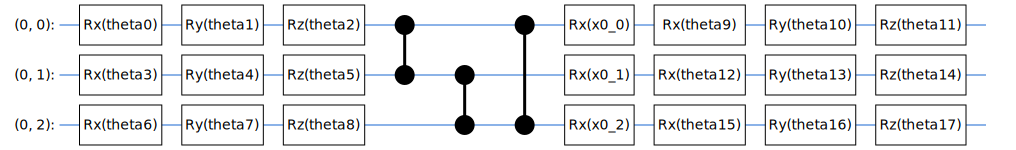

In [ ]:
n_qubits, n_layers = 3, 1
qubits = cirq.GridQubit.rect(1, n_qubits)
circuit, _, _ = generate_circuit(qubits, n_layers)
SVGCircuit(circuit)

The output shows a visual representation of a quantum circuit. Here's a breakdown of what the output means:

***Quantum Circuit Structure***

1. **Qubits**:
   - The circuit operates on three qubits, as indicated by the grid labels (0, 0), (0, 1), and (0, 2). These labels represent the positions of the qubits on a grid.

2. **Layers**:
   - The circuit contains one layer (`n_layers = 1`) of quantum operations, which includes both single-qubit rotations and entangling operations.

3. **Single-Qubit Rotations**:
   - Each qubit undergoes a series of single-qubit rotation gates:
     - **Rx**: Rotation around the X-axis.
     - **Ry**: Rotation around the Y-axis.
     - **Rz**: Rotation around the Z-axis.
   - These rotations are parameterized by variables such as `theta0`, `theta1`, `theta2`, etc. These parameters are likely variables that will be optimized during training if this circuit is part of a quantum machine learning model.

4. **Entangling Gates**:
   - The black dots connected by lines represent Controlled-Z (CZ) gates, which are entangling gates that create quantum entanglement between the qubits.
   - The CZ gates are applied between adjacent qubits, meaning:
     - A CZ gate connects the first qubit (0,0) with the second qubit (0,1).
     - Another CZ gate connects the second qubit (0,1) with the third qubit (0,2).

5. **Second Set of Single-Qubit Rotations**:
   - After the entangling operations, each qubit undergoes another series of single-qubit rotations (again using Rx, Ry, and Rz gates) with a different set of parameters (`theta9`, `theta10`, `theta11`, etc.).
   
***Interpretation***

- **Quantum Circuit**: The circuit is a typical structure used in quantum machine learning, specifically in variational quantum circuits (VQCs). The single-qubit rotations allow the circuit to encode input data and apply variational parameters, while the entangling gates create correlations between qubits, which is essential for leveraging the power of quantum computation.
- **Purpose**: This circuit is likely designed to process quantum information for a specific task, such as classification, optimization, or reinforcement learning, where the parameters (`theta`) would be optimized to minimize a loss function.

In summary, the image shows a quantum circuit with three qubits and one layer of operations, including both single-qubit rotations and entangling gates, which could be part of a larger quantum algorithm.

## ReUploadingPQC Layer using Controlled-PQC

To construct the re-uploading PQC as depicted in the figure, you can develop a custom Keras layer. This layer will handle the management of the trainable parameters—specifically, the variational angles $ \boldsymbol{\theta}$ and input-scaling parameters $ \boldsymbol{\lambda} $—and map the input values (input state $ s $) to the corresponding symbols in the quantum circuit.

Here’s how you can proceed:

1. **Custom Keras Layer**: Define a custom Keras layer that includes the trainable parameters $ \boldsymbol{\theta} $ and $ \boldsymbol{\lambda} $. This layer will be responsible for managing these parameters and ensuring they are updated during training.

2. **Input Mapping**: Within this layer, implement the logic to map the input state $ s $ to the quantum circuit's input gates. The input-scaling parameters $ \boldsymbol{\lambda} $ will be used to modulate the input state values before they are applied as rotation angles in the circuit.

3. **Circuit Integration**: Integrate these mapped inputs and trainable parameters into the quantum circuit defined in Cirq. The custom layer will then apply the appropriate operations in the circuit, leveraging the structure of the re-uploading PQC.

By constructing the PQC in this manner, the custom Keras layer will efficiently manage the parameters and input processing, allowing for seamless integration with TensorFlow Quantum and subsequent training of the reinforcement learning algorithms.

In [ ]:
class ReUploadingPQC(tf.keras.layers.Layer):
    """
    Performs the transformation (s_1, ..., s_d) -> (theta_1, ..., theta_N, lmbd[1][1]s_1, ..., lmbd[1][M]s_1,
        ......., lmbd[d][1]s_d, ..., lmbd[d][M]s_d) for d=input_dim, N=theta_dim and M=n_layers.
    An activation function from tf.keras.activations, specified by `activation` ('linear' by default) is
        then applied to all lmbd[i][j]s_i.
    All angles are finally permuted to follow the alphabetical order of their symbol names, as processed
        by the ControlledPQC.
    """

    def __init__(self, qubits, n_layers, observables, activation="linear", name="re-uploading_PQC"):
        super(ReUploadingPQC, self).__init__(name=name)
        self.n_layers = n_layers
        self.n_qubits = len(qubits)

        circuit, theta_symbols, input_symbols = generate_circuit(qubits,
                                                                 n_layers)

        theta_init = tf.random_uniform_initializer(minval=0.0,
                                                   maxval=np.pi)

        self.theta = tf.Variable(initial_value = theta_init(shape=(1,
                                                                   len(theta_symbols)),
                                                            dtype="float32"),
                                 trainable=True,
                                 name="thetas")

        lmbd_init = tf.ones(shape=(self.n_qubits * self.n_layers))
        self.lmbd = tf.Variable(initial_value=lmbd_init,
                                dtype="float32",
                                trainable=True,
                                name="lambdas")

        # Define explicit symbol order.
        symbols = [str(symb) for symb in theta_symbols + input_symbols]
        self.indices = tf.constant([symbols.index(a) for a in sorted(symbols)])

        self.activation = activation
        self.empty_circuit = tfq.convert_to_tensor([cirq.Circuit()])
        self.computation_layer = tfq.layers.ControlledPQC(circuit,
                                                          observables)

    def call(self, inputs):
        # inputs[0] = encoding data for the state.
        batch_dim = tf.gather(tf.shape(inputs[0]), 0)

        tiled_up_circuits = tf.repeat(self.empty_circuit,
                                      repeats=batch_dim)
        tiled_up_thetas = tf.tile(self.theta,
                                  multiples=[batch_dim,
                                             1])
        tiled_up_inputs = tf.tile(inputs[0],
                                  multiples=[1,
                                             self.n_layers])

        scaled_inputs = tf.einsum("i,ji->ji",
                                  self.lmbd,
                                  tiled_up_inputs)

        squashed_inputs = tf.keras.layers.Activation(self.activation)(scaled_inputs)

        joined_vars = tf.concat([tiled_up_thetas,
                                 squashed_inputs],
                                axis=1)
        joined_vars = tf.gather(joined_vars,
                                self.indices,
                                axis=1)

        return self.computation_layer([tiled_up_circuits,
                                       joined_vars])

# Policy-Gradient RL with PQC Policies

In this section, you will implement the policy-gradient algorithm as presented in <a href="https://arxiv.org/abs/2103.05577" class="external">[1]</a>. The first step involves constructing the `softmax-VQC` policy, where VQC stands for variational quantum circuit. This policy is derived from the previously defined PQC and is expressed as follows:

$$ \pi_\theta(a|s) = \frac{e^{\beta \langle O_a \rangle_{s,\theta}}}{\sum_{a'} e^{\beta \langle O_{a'} \rangle_{s,\theta}}} $$

In this formulation:

- $\langle O_a \rangle_{s,\theta}$ represents the expectation values of the observables $O_a$, which correspond to each action $ a $. These expectation values are obtained from measurements at the output of the PQC, conditioned on the input state $ s $ and the trainable parameters $ \theta $.

- $ \beta $ is a tunable inverse-temperature parameter that controls the sharpness of the softmax distribution.

- The softmax function $ \pi_\theta(a|s) $ outputs the probability of selecting action $ a $ given the state $ s $, by normalizing the exponentiated expectation values across all possible actions $ a' $.

This `softmax-VQC` policy will be used as the core component of the policy-gradient algorithm, where the parameters $ \theta $ are updated iteratively to maximize the expected reward based on the agent's interactions with the environment.

## Policy-Gradient Algorithm

To implement the policy-gradient algorithm, you can utilize the same observables as those employed in <a href="https://arxiv.org/abs/2103.05577" class="external">[1]</a> for the CartPole environment. Specifically, you will use a global Pauli product $ Z_0Z_1Z_2Z_3 $ that acts on all qubits. This Pauli product will be weighted by an action-specific weight for each action, allowing the policy to differentiate between actions based on the quantum state.

***Implementation Steps***

1. **Pauli Product Observable**: Define the global $ Z_0Z_1Z_2Z_3 $ Pauli product that acts on all qubits in your quantum circuit. This observable will serve as the basis for calculating the expectation value for each action.

2. **Action-Specific Weights**: To apply the action-specific weighting of the Pauli product, create an additional `tf.keras.layers.Layer`. This layer will store the trainable weights corresponding to each action. These weights will be applied multiplicatively to the expectation value $ \langle Z_0Z_1Z_2Z_3 \rangle_{s,\theta} $, allowing for flexibility in the policy's response to different actions.

3. **Integration with Softmax-VQC**: The weighted expectation values will be used as inputs to the `softmax` function, as described in the policy definition:

   $$
   \pi_\theta(a|s) = \frac{e^{\beta w_a \langle Z_0Z_1Z_2Z_3 \rangle_{s,\theta}}}{\sum_{a'} e^{\beta w_{a'} \langle Z_0Z_1Z_2Z_3 \rangle_{s,\theta}}}
   $$

   Here, $ w_a $ represents the action-specific weight for action $ a $, which is learned during training.

By following these steps, you will effectively implement the `softmax-VQC` policy for the CartPole environment, enabling the policy-gradient algorithm to learn and optimize the quantum agent's actions based on the observed states.

In [ ]:
class Alternating(tf.keras.layers.Layer):
    def __init__(self, output_dim):
        super(Alternating, self).__init__()
        self.w = tf.Variable(
            initial_value=tf.constant([[(-1.)**i for i in range(output_dim)]]), dtype="float32",
            trainable=True, name="obs-weights")

    def call(self, inputs):
        return tf.matmul(inputs, self.w)

### Defining the PQC

In [ ]:
n_qubits = 4 # Dimension of the state vectors in CartPole
n_layers = 5 # Number of layers in the PQC
n_actions = 2 # Number of actions in CartPole

qubits = cirq.GridQubit.rect(1, n_qubits)

### Observables of PQC

In [ ]:
ops = [cirq.Z(q) for q in qubits]
observables = [reduce((lambda x, y: x * y), ops)] # Z_0*Z_1*Z_2*Z_3

To implement the `softmax-VQC` policy, you can define a `tf.keras.Model` that sequentially applies the following layers:

1. **ReUploadingPQC Layer**: The first layer is the `ReUploadingPQC`, which encapsulates the parameterized quantum circuit (PQC) with data re-uploading. This layer processes the input state and produces the quantum expectation values.

2. **Post-Processing Layer**: Following the `ReUploadingPQC` layer, include a post-processing layer that computes the weighted observables. This layer will utilize an `Alternating` approach to apply the action-specific weights to the expectation values generated by the PQC.

3. **Softmax Layer**: The final layer in the model is a `tf.keras.layers.Softmax`, which converts the weighted observables into the `softmax-VQC` policy. This policy represents the probability distribution over the possible actions the agent can take, based on the input state.

***Formally Defined Model***

The `tf.keras.Model` can be constructed as follows:

1. **ReUploadingPQC Layer**: This layer applies the PQC defined earlier, taking the input state and outputting a vector of expectation values.

2. **Post-Processing with Weighted Observables**: The subsequent layer computes the weighted observables using the `Alternating` method, where each expectation value is multiplied by a corresponding action-specific weight.

3. **Softmax-VQC Policy Output**: Finally, the softmax layer normalizes these weighted observables to produce the action probabilities, defining the agent's policy.

By structuring the model in this way, you create a seamless pipeline that integrates the quantum circuit with classical post-processing to yield a reinforcement learning policy suitable for training and deployment.

In [ ]:
def generate_model_policy(qubits, n_layers, n_actions, beta, observables):
    """Generates a Keras model for a data re-uploading PQC policy."""

    input_tensor = tf.keras.Input(shape=(len(qubits)),
                                  dtype=tf.dtypes.float32,
                                  name='input')
    re_uploading_pqc = ReUploadingPQC(qubits,
                                      n_layers,
                                      observables)([input_tensor])
    process = tf.keras.Sequential([Alternating(n_actions),
                                   tf.keras.layers.Lambda(lambda x: x * beta),
                                   tf.keras.layers.Softmax()],
                                  name="observables-policy")

    policy = process(re_uploading_pqc)

    model = tf.keras.Model(inputs=[input_tensor],
                           outputs=policy)

    return model

In [ ]:
model = generate_model_policy(qubits,
                              n_layers,
                              n_actions,
                              1.0,
                              observables)

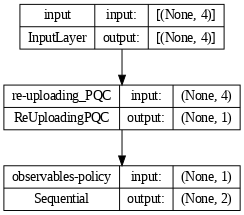

In [ ]:
tf.keras.utils.plot_model(model,
                          show_shapes=True,
                          dpi=70)

The image shows a graphical representation of a TensorFlow Keras model, specifically a Sequential model.

***Model Structure***

1. **Input Layer**:
   - **Name**: `input`
   - **Shape**: `[(None, 4)]`
   - The input layer receives input data with a shape of `(None, 4)`. Here, `None` indicates that the batch size is flexible, while `4` represents the number of features or dimensions in each input sample. This likely means that each sample in the dataset has 4 features.

2. **ReUploadingPQC Layer**:
   - **Name**: `re-uploading_PQC`
   - **Class**: `ReUploadingPQC`
   - **Input Shape**: `[(None, 4)]`
   - **Output Shape**: `[(None, 1)]`
   - The `ReUploadingPQC` layer applies a Parameterized Quantum Circuit (PQC) with data re-uploading. The input to this layer is the same as the input layer, `(None, 4)`. After processing the input, the PQC outputs data with a shape of `(None, 1)`, indicating that it produces a single value (possibly a probability or expectation value) for each input sample.

3. **Observables-Policy Layer**:
   - **Name**: `observables-policy`
   - **Class**: `Sequential`
   - **Input Shape**: `[(None, 1)]`
   - **Output Shape**: `[(None, 2)]`
   - The `observables-policy` layer is a Sequential model (or a simple sequential layer) that processes the output from the `ReUploadingPQC` layer. It takes the `(None, 1)` input and produces an output of shape `(None, 2)`. This suggests that the layer is responsible for generating two outputs, likely corresponding to two different actions or classes in the context of a policy or Q-value approximation.

***Interpretation***

- **Overall Model**: The model appears to be part of a quantum machine learning framework, where the `ReUploadingPQC` is the core quantum component that processes the input features. The output from this quantum layer is then passed through a further processing layer (`observables-policy`), which likely produces action probabilities or Q-values depending on whether this model is used in a policy-gradient or Q-learning algorithm.
  
- **Usage**: The structure suggests that this model could be used in a reinforcement learning setting, where the quantum circuit (PQC) contributes to decision-making or value estimation. The final layer’s output, with shape `(None, 2)`, might represent a binary decision or a two-action choice in the environment (e.g., moving left or right in a CartPole environment).

In summary, this model is designed to process inputs through a quantum layer and output a decision or value estimate, as part of a quantum-enhanced reinforcement learning algorithm.

We can now proceed to train the PQC-based policy on the CartPole-v1 environment using the basic `REINFORCE` algorithm, as described in Algorithm 1 of <a href="https://arxiv.org/abs/2103.05577" class="external">[1]</a>. The following key considerations should be taken into account:

1. **Separate Optimizers for Different Parameter Groups**: Given that the scaling parameters, variational angles, and observable weights are each trained with distinct learning rates, it is advisable to define three separate optimizers, each with its own learning rate. These optimizers will independently update the respective groups of parameters, ensuring that each set of parameters is optimized appropriately.

2. **Policy-Gradient Loss Function**: The loss function in policy-gradient reinforcement learning is given by:

   $$
   \mathcal{L}(\theta) = -\frac{1}{|\mathcal{B}|}\sum_{\text{episode} \in \mathcal{B}} \left(\sum_{t=0}^{H-1} \log(\pi_\theta(a_t|s_t)) \sum_{t'=1}^{H-t} \gamma^{t'} r_{t+t'} \right)
   $$

   Here, $ \mathcal{B} $ represents a batch of episodes $ (s_0, a_0, r_1, s_1, a_1, \ldots) $, which consist of interactions within the environment following the policy $ \pi_\theta $. This loss function differs from the typical supervised learning loss, where fixed target values guide the model's training. Instead, the policy-gradient loss reflects the cumulative reward expected from following the policy, making it unsuitable for a simple training function like `model.fit`.

3. **Using `tf.GradientTape` for Custom Training**: To handle the complexities of reinforcement learning, including policy sampling and environment interactions, you should use `tf.GradientTape`. This tool allows you to track the computations involving the PQC, capturing their contributions to the loss function throughout the interactions. After running a batch of episodes, you can apply backpropagation to compute the gradients of the loss with respect to the PQC parameters. These gradients are then used by the optimizers to update the policy model effectively.

By carefully managing these considerations, you can ensure that the PQC policy is trained efficiently and accurately, leveraging the advantages of quantum reinforcement learning in the CartPole-v1 environment.

### Defining a Function that gathers episodes of interaction

In [ ]:
def gather_episodes(state_bounds, n_actions, model, n_episodes, env_name):
    """Interact with environment in batched fashion."""

    trajectories = [defaultdict(list) for _ in range(n_episodes)]
    envs = [gym.make(env_name) for _ in range(n_episodes)]

    done = [False for _ in range(n_episodes)]
    states = [e.reset() for e in envs]

    while not all(done):
        unfinished_ids = [i for i in range(n_episodes) if not done[i]]
        normalized_states = [s/state_bounds for i, s in enumerate(states) if not done[i]]

        for i, state in zip(unfinished_ids, normalized_states):
            trajectories[i]['states'].append(state)

        # Compute policy for all unfinished envs in parallel
        states = tf.convert_to_tensor(normalized_states)
        action_probs = model([states])

        # Store action and transition all environments to the next state
        states = [None for i in range(n_episodes)]
        for i, policy in zip(unfinished_ids, action_probs.numpy()):
            action = np.random.choice(n_actions, p=policy)
            states[i], reward, done[i], _ = envs[i].step(action)
            trajectories[i]['actions'].append(action)
            trajectories[i]['rewards'].append(reward)

    return trajectories

### Discounted Returns

and a function that computes discounted returns $\sum_{t'=1}^{H-t} \gamma^{t'} r_{t+t'}$ out of the rewards $r_t$ collected in an episode:

In [ ]:
def compute_returns(rewards_history, gamma):
    """Compute discounted returns with discount factor `gamma`."""
    returns = []
    discounted_sum = 0
    for r in rewards_history[::-1]:
        discounted_sum = r + gamma * discounted_sum
        returns.insert(0, discounted_sum)

    # Normalize them for faster and more stable learning
    returns = np.array(returns)
    returns = (returns - np.mean(returns)) / (np.std(returns) + 1e-8)
    returns = returns.tolist()

    return returns

### Define the Hyperparameters

In [ ]:
state_bounds = np.array([2.4, 2.5, 0.21, 2.5])
gamma = 1
batch_size = 10
n_episodes = 1000

### Prepare the Optimizers

In [ ]:
optimizer_in = tf.keras.optimizers.Adam(learning_rate=0.1, amsgrad=True)
optimizer_var = tf.keras.optimizers.Adam(learning_rate=0.01, amsgrad=True)
optimizer_out = tf.keras.optimizers.Adam(learning_rate=0.1, amsgrad=True)

# Assign the model parameters to each optimizer
w_in, w_var, w_out = 1, 0, 2

## Executing the Policy Updating Functions

In [ ]:
@tf.function
def reinforce_update(states, actions, returns, model):
    states = tf.convert_to_tensor(states)
    actions = tf.convert_to_tensor(actions)
    returns = tf.convert_to_tensor(returns)

    with tf.GradientTape() as tape:
        tape.watch(model.trainable_variables)
        logits = model(states)
        p_actions = tf.gather_nd(logits,
                                 actions)
        log_probs = tf.math.log(p_actions)
        loss = tf.math.reduce_sum(-log_probs * returns) / batch_size

    grads = tape.gradient(loss, model.trainable_variables)

    for optimizer, w in zip([optimizer_in, optimizer_var, optimizer_out], [w_in, w_var, w_out]):
        optimizer.apply_gradients([(grads[w],
                                    model.trainable_variables[w])])

### Main Training Loop of the Agent

In [ ]:
env_name = "CartPole-v1"

# Start training the agent
episode_reward_history = []
for batch in range(n_episodes // batch_size):
    # Gather episodes
    episodes = gather_episodes(state_bounds, n_actions, model, batch_size, env_name)

    # Group states, actions and returns in numpy arrays
    states = np.concatenate([ep['states'] for ep in episodes])
    actions = np.concatenate([ep['actions'] for ep in episodes])
    rewards = [ep['rewards'] for ep in episodes]
    returns = np.concatenate([compute_returns(ep_rwds, gamma) for ep_rwds in rewards])
    returns = np.array(returns, dtype=np.float32)

    id_action_pairs = np.array([[i, a] for i, a in enumerate(actions)])

    # Update model parameters.
    reinforce_update(states, id_action_pairs, returns, model)

    # Store collected rewards
    for ep_rwds in rewards:
        episode_reward_history.append(np.sum(ep_rwds))

    avg_rewards = np.mean(episode_reward_history[-10:])

    print('Finished episode', (batch + 1) * batch_size,
          'Average rewards: ', avg_rewards)

    if avg_rewards >= 500.0:
        break

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Finished episode 10 Average rewards:  18.4
Finished episode 20 Average rewards:  29.0
Finished episode 30 Average rewards:  33.9
Finished episode 40 Average rewards:  54.5
Finished episode 50 Average rewards:  44.6
Finished episode 60 Average rewards:  71.2
Finished episode 70 Average rewards:  60.8
Finished episode 80 Average rewards:  85.5
Finished episode 90 Average rewards:  99.4
Finished episode 100 Average rewards:  103.6
Finished episode 110 Average rewards:  130.4
Finished episode 120 Average rewards:  204.7
Finished episode 130 Average rewards:  122.6
Finished episode 140 Average rewards:  201.6
Finished episode 150 Average rewards:  202.2
Finished episode 160 Average rewards:  180.6
Finished episode 170 Average rewards:  186.5
Finished episode 180 Average rewards:  178.1
Finished episode 190 Average rewards:  218.2
Finished episode 200 Average rewards:  213.5
Finished episode 210 Average rewards:  306.2
Finished episode 220 Average rewards:  345.1
Finished episode 230 Average

### Plotting the Learning History

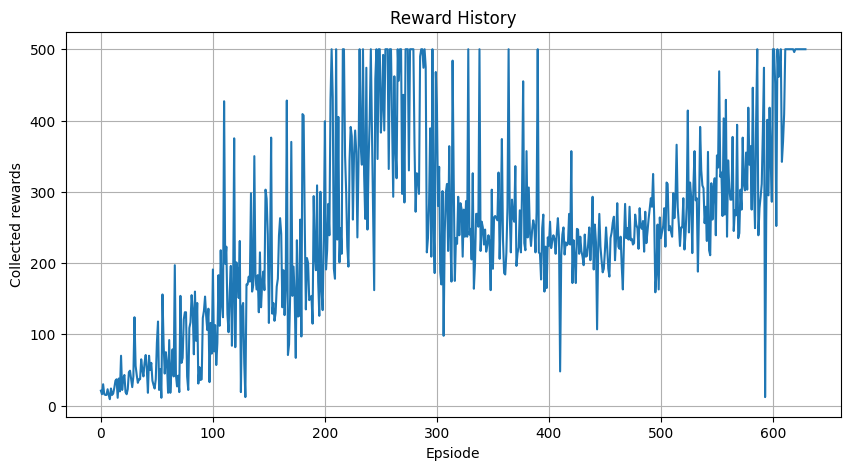

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(episode_reward_history)
plt.xlabel('Epsiode')
plt.ylabel('Collected rewards')
plt.title('Reward History')
plt.grid(True)
plt.show()

The plot you provided is titled "Reward History" and shows the rewards collected by an agent per episode during a reinforcement learning training process. Here's an explanation of the plot:

***Axes***
- **X-axis (Episode)**: This axis represents the number of episodes, which are iterations of the agent interacting with the environment. Each episode consists of the agent performing actions in the environment until it either succeeds, fails, or reaches a predefined limit of steps.
  
- **Y-axis (Collected Rewards)**: This axis shows the total rewards the agent collected in each episode. Rewards are typically positive values that indicate how well the agent is performing its task.

***Plot Interpretation***
- **Initial Phase (Early Episodes)**: At the beginning of the training (episodes 0 to 100), the rewards are generally low and vary widely. This suggests that the agent is still learning how to interact effectively with the environment. It makes a lot of mistakes, leading to inconsistent performance and lower reward totals.
  
- **Middle Phase (Around Episodes 100 to 300)**: In this phase, there's a noticeable improvement in the agent's performance. The rewards start to increase, and while there's still some fluctuation, the agent is more consistently achieving higher rewards. This indicates that the learning process is progressing, and the agent is starting to understand the environment better.

- **Later Phase (Around Episodes 300 to 600)**: After around episode 300, the reward values fluctuate more significantly. This could indicate that the agent is still exploring different strategies and sometimes makes suboptimal decisions, leading to variable rewards. However, as training progresses further, there are periods where the agent achieves near-optimal performance (close to 500 rewards per episode).

- **Convergence (Towards the End)**: Near the end of the plot, around episode 600, the agent's performance stabilizes at close to the maximum reward value (500 rewards per episode). This suggests that the agent has learned an effective strategy and is consistently performing well in the environment.

***Summary***
- **Learning Process**: The plot reflects a typical reinforcement learning process, where the agent starts with little knowledge, gradually improves, and eventually converges towards an optimal strategy that maximizes rewards.
- **Performance Fluctuations**: The fluctuations in rewards, especially in the middle phase, are common in reinforcement learning as the agent balances exploration (trying new strategies) and exploitation (using known strategies that yield high rewards).
- **Convergence**: The agent ultimately converges towards a high-performing strategy, as indicated by the rewards stabilizing at near-optimal levels in the final episodes.

This plot is a good indicator that the training was successful, as the agent learned to maximize its rewards over time.

### Visualization through Animation

The performance of the agent can be visualized using `env.render()` in a sample episode

In [ ]:
from PIL import Image
import os

env = gym.make('CartPole-v1')
state = env.reset()
frames = []

for t in range(500):
     im = Image.fromarray(env.render(mode='rgb_array'))
     frames.append(im)
     policy = model([tf.convert_to_tensor([state/state_bounds])])
     action = np.random.choice(n_actions, p=policy.numpy()[0])
     state, _, done, _ = env.step(action)
     if done:
         break
env.close()

if not os.path.exists('./images'):
    os.makedirs('./images')

frames[1].save('./images/gym_CartPole.gif',
               save_all=True,
               append_images=frames[2:],
               optimize=False,
               duration=40,
               loop=0)

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecat

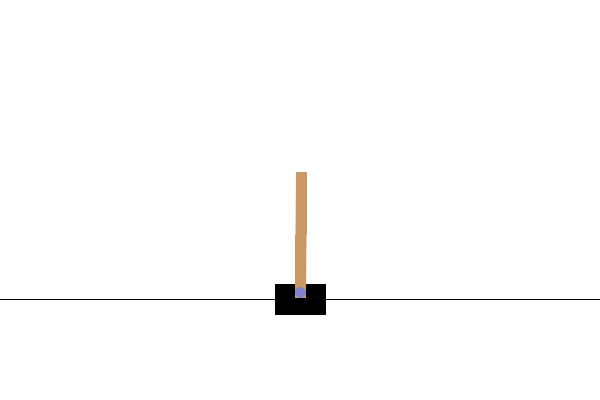

The result of running this code is an animated GIF file named `gym_CartPole.gif`, which shows the CartPole environment's state over time as the agent interacts with it. The GIF captures the movement of the cart and the pole as the agent attempts to balance the pole by taking actions based on its policy.

This file is what you've uploaded, and it visually represents the performance of your agent in the CartPole environment.

# Deep Q-learning with PQC Q-function Approximators

In this section, you will implement the deep Q-learning algorithm as described in [Skolik et al., 2021](https://arxiv.org/abs/2103.15084). Unlike the policy-gradient approach, the deep Q-learning method uses a Parameterized Quantum Circuit (PQC) to approximate the Q-function of the agent. Specifically, the PQC serves as a function approximator for the Q-values, defined as:

$$
Q_\theta(s,a) = \langle O_a \rangle_{s,\theta}
$$

where $\langle O_a \rangle_{s,\theta}$ represents the expectation values of observables $ O_a $ (one for each action) measured at the output of the PQC.

***Q-Learning Loss Function***

The Q-values are updated using a loss function derived from the Q-learning algorithm:

$$
\mathcal{L}(\theta) = \frac{1}{|\mathcal{B}|}\sum_{(s,a,r,s') \in \mathcal{B}} \left(Q_\theta(s,a) - \left[r + \gamma \max_{a'} Q_{\theta'}(s',a')\right]\right)^2
$$

In this formulation:

- $ \mathcal{B} $ is a batch of one-step interactions $ (s,a,r,s') $ with the environment, sampled from the replay memory.
- $ \theta $ are the parameters of the main PQC.
- $ \theta' $ are the parameters of the target PQC, which is a periodically updated copy of the main PQC. This target PQC is used to stabilize learning by providing consistent target values.

***Implementation Strategy***

1. **Parameterized Quantum Circuit (PQC)**: Define the PQC that approximates the Q-values $ Q_\theta(s,a) $. The PQC outputs the expectation values $ \langle O_a \rangle_{s,\theta} $, which correspond to the Q-values for each action $ a $ given the state $ s $.

2. **Target Network**: Maintain a separate target PQC network, where the parameters $ \theta' $ are copied from the main PQC at regular intervals during training. This target network provides stable targets for updating the Q-function.

3. **Replay Memory**: Store past interactions $ (s,a,r,s') $ in a replay memory, and sample batches from this memory to update the Q-function. This helps break the correlation between consecutive interactions and improves the efficiency of the learning process.

4. **Loss Function and Optimization**: Use the Q-learning loss function to compute the difference between the predicted Q-values and the target values, and apply backpropagation to update the parameters $ \theta $ of the main PQC.

By following this approach, you will be able to implement the deep Q-learning algorithm using quantum circuits, enabling the agent to learn and optimize its behavior in the CartPole-v1 environment.

## Implementation of Deep Q-Learning Algorithm

To implement the deep Q-learning algorithm using the same observables as those presented in [Skolik et al., 2021](https://arxiv.org/abs/2103.15084) for the CartPole environment, you can proceed with the following steps:

***Observables Definition***

- **Action 0**: Use the $ Z_0Z_1 $ Pauli product as the observable for action 0.
- **Action 1**: Use the $ Z_2Z_3 $ Pauli product as the observable for action 1.

Both observables should be re-scaled so that their expectation values fall within the range $[0,1]$. This re-scaling is achieved by applying the transformation:

$$
\text{Re-scaled Expectation Value} = \frac{1 + \langle Z_0Z_1 \rangle_{s,\theta}}{2}
$$

for action 0, and similarly:

$$
\text{Re-scaled Expectation Value} = \frac{1 + \langle Z_2Z_3 \rangle_{s,\theta}}{2}
$$

for action 1.

***Implementation Steps***

1. **Re-Scaling and Weighting Layer**: Define an additional `tf.keras.layers.Layer` that stores the action-specific weights and applies them to the re-scaled expectation values. This layer will perform the following tasks:

   - Rescale the expectation values of the observables $ Z_0Z_1$ and $ Z_2Z_3 $ to ensure they are within the $[0,1]$ range.
   - Multiply the re-scaled expectation values by the corresponding action-specific weights.

2. **Integration with PQC**: After defining this layer, integrate it with the PQC output to generate the weighted Q-values for each action:

   - For action 0: $$ Q_\theta(s,0) = w_0 \times \frac{1 + \langle Z_0Z_1 \rangle_{s,\theta}}{2} $$
   - For action 1: $$ Q_\theta(s,1) = w_1 \times \frac{1 + \langle Z_2Z_3 \rangle_{s,\theta}}{2} $$

   Here, $ w_0 $ and $ w_1 $ are the trainable action-specific weights.


By re-scaling the observables and applying action-specific weights, you effectively implement the Q-function approximator within the deep Q-learning framework. This approach allows the quantum reinforcement learning agent to learn and optimize the Q-values associated with different actions, leading to improved performance in the CartPole-v1 environment.

### Rescaling the Observables

In [ ]:
class Rescaling(tf.keras.layers.Layer):
    def __init__(self, input_dim):
        super(Rescaling, self).__init__()
        self.input_dim = input_dim

        self.w = tf.Variable(initial_value=tf.ones(shape=(1,
                                                          input_dim)),
                             dtype="float32",
                             trainable=True,
                             name="obs-weights")


    def call(self, inputs):
        return tf.math.multiply((inputs+1)/2,
                                tf.repeat(self.w,
                                          repeats=tf.shape(inputs)[0],
                                          axis=0))

### Define PQC and its Observables

In [ ]:
n_qubits = 4 # Dimension of the state vectors in CartPole
n_layers = 5 # Number of layers in the PQC
n_actions = 2 # Number of actions in CartPole

qubits = cirq.GridQubit.rect(1, n_qubits)
ops = [cirq.Z(q) for q in qubits]
observables = [ops[0]*ops[1], ops[2]*ops[3]] # Z_0*Z_1 for action 0 and Z_2*Z_3 for action 1

Define a `tf.keras.Model` that constructs a Q-function approximator, analogous to the PQC-policy model. This model will serve as the basis for generating both the main and target models utilized by our Q-learning agent.

In [ ]:
def generate_model_Qlearning(qubits, n_layers, n_actions, observables, target):
    """Generates a Keras model for a data re-uploading PQC Q-function approximator."""

    input_tensor = tf.keras.Input(shape=(len(qubits), ), dtype=tf.dtypes.float32, name='input')
    re_uploading_pqc = ReUploadingPQC(qubits, n_layers, observables, activation='tanh')([input_tensor])
    process = tf.keras.Sequential([Rescaling(len(observables))], name=target*"Target"+"Q-values")
    Q_values = process(re_uploading_pqc)
    model = tf.keras.Model(inputs=[input_tensor], outputs=Q_values)

    return model

In [ ]:
model = generate_model_Qlearning(qubits, n_layers, n_actions, observables, False)

In [ ]:
model_target = generate_model_Qlearning(qubits, n_layers, n_actions, observables, True)

In [ ]:
model_target.set_weights(model.get_weights())

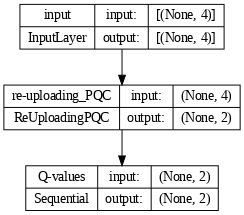

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=70)

The image appears to be a model architecture visualization created using TensorFlow's `plot_model` function. This diagram gives a visual representation of the layers within a neural network model, displaying the flow of data and the shape of the data as it moves through each layer.

1. **Input Layer (`InputLayer`):**
   - **Shape:** The input shape is `(None, 4)`, meaning the model expects inputs with 4 features. The `None` indicates that the model can handle an arbitrary number of samples in a batch.
   - **Purpose:** This layer is simply the entry point of the model, accepting input data to be passed through subsequent layers.

2. **ReUploadingPQ (`ReUploadingPQC`):**
   - **Shape:** This custom layer takes the input from the previous layer `(None, 4)` and outputs a shape of `(None, 2)`.
   - **Purpose:** Given the name, this layer likely implements a parameterized quantum circuit (PQC), possibly a re-uploading circuit used in quantum machine learning. The dimensionality reduction from 4 features to 2 suggests this layer performs some form of feature extraction or dimensionality reduction, possibly leveraging quantum operations.

3. **Sequential (`Sequential`):**
   - **Shape:** The output shape is `(None, 2)`, meaning it processes the 2-dimensional data from the previous layer without changing its shape.
   - **Purpose:** This part of the model likely includes a sequential layer, which might be a dense layer or another layer that processes the 2 features to output Q-values. Q-values are often associated with reinforcement learning, particularly in Q-learning or deep Q-networks (DQNs), which suggests that this model might be used for such a purpose.


The model shown in the diagram is designed for a quantum-enhanced machine learning task, potentially involving reinforcement learning (indicated by the term "Q-values"). The input data starts with 4 features, which are then processed through a custom layer, possibly implementing quantum operations, reducing it to 2 features, and finally, these are passed through another layer to output the final Q-values. The `plot_model` function is used here to visualize the architecture, making it easier to understand the structure and flow of data within the model.

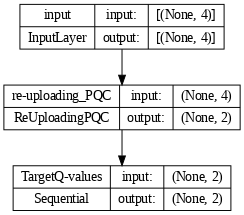

In [ ]:
tf.keras.utils.plot_model(model_target, show_shapes=True, dpi=70)

The image is another visualization of a model architecture, similar to the previous one. This diagram represents a `model_target`, which suggests it is a part of a reinforcement learning setup, where this model serves as a target network, commonly used in deep Q-learning.

1. **Input Layer (`InputLayer`):**
   - **Shape:** `(None, 4)`. The input layer expects a batch of samples with 4 features each. The `None` indicates that the batch size can vary.

2. **ReUploadingPQC Layer (`ReUploadingPQC`):**
   - **Shape:** This custom layer takes the input `(None, 4)` and outputs `(None, 2)`.
   - **Purpose:** This layer, as indicated by its name, likely represents a parameterized quantum circuit, specifically a re-uploading circuit used in quantum machine learning. It processes the input data and reduces it to 2 features, possibly by leveraging quantum operations.

3. **Sequential Layer (`Sequential`):**
   - **Shape:** This layer takes the 2-dimensional output from the previous layer and maintains the same shape `(None, 2)`.
   - **Purpose:** This part of the model processes the reduced data to produce the final output. The name "TargetQ-values" implies that this layer outputs Q-values, which are essential in reinforcement learning for evaluating the quality of actions in given states.

This model, named `model_target`, likely serves as a target network in a deep Q-learning algorithm. In such setups, the target network is used to stabilize training by providing target Q-values that the main network tries to approximate. The architecture is similar to the previous model, with the key difference being the label "TargetQ-values," which signifies its role in producing the Q-values that serve as a reference during the learning process.

The presence of the ReUploadingPQC layer again hints at the integration of quantum computing techniques within the reinforcement learning framework, potentially to enhance learning efficiency or performance.

## Deep Q-learning Algorithm on the CartPole-v1 Environment

You can now implement the deep Q-learning algorithm and test it on the CartPole-v1 environment. For the agent's policy, you can employ an $\varepsilon$-greedy policy, which balances exploration and exploitation:

$$
\pi(a|s) =
\begin{cases}
\delta_{a,\text{argmax}_{a'} Q_\theta(s,a')} & \text{with probability } 1 - \varepsilon \\
\frac{1}{\text{num\_actions}} & \text{with probability } \varepsilon
\end{cases}
$$

***In this policy***

- **Exploitation**: With probability $1 - \varepsilon$, the policy selects the action $a$ that maximizes the Q-value $ Q_\theta(s,a') $ for the current state $ s $.
- **Exploration**: With probability $ \varepsilon $, the policy selects an action randomly from the set of available actions, promoting exploration of the environment.

***$\varepsilon$-Decay***

- **Decay Mechanism**: The exploration parameter $ \varepsilon $ is decayed multiplicatively after each episode, typically following the form $ \varepsilon = \varepsilon \times \text{decay rate} $. This allows the agent to explore more in the initial episodes and gradually shift towards exploitation as learning progresses.

***Implementation Steps***

1. **Initialize the PQC-based Q-function**: Start by defining the PQC that approximates the Q-values $ Q_\theta(s,a) $.

2. **Define the $\varepsilon$-Greedy Policy**: Implement the $\varepsilon$-greedy policy using the above formulation. Ensure that the policy selects the action with the highest Q-value most of the time, while occasionally exploring other actions based on the current value of $ \varepsilon $.

3. **Training Loop**:
   - For each episode, use the $\varepsilon$-greedy policy to interact with the environment and store the transitions in the replay memory.
   - Sample a batch of transitions from the replay memory and compute the loss using the Q-learning update rule.
   - Update the PQC parameters by backpropagating the loss through the network.
   - Decay the value of $ \varepsilon $ after each episode.

4. **Test the Agent**: After training, test the agent's performance by evaluating it in the CartPole-v1 environment without exploration (i.e., setting $ \varepsilon = 0 $).

By following these steps, you will implement and test the deep Q-learning algorithm with a PQC-based Q-function, leveraging the $\varepsilon$-greedy policy to balance exploration and exploitation during the training process. This approach should allow the quantum reinforcement learning agent to effectively learn and optimize its actions in the CartPole-v1 environment.

### Defination of Interaction Function within the Environment

In [ ]:
def interact_env(state, model, epsilon, n_actions, env):
    # Preprocess state
    state_array = np.array(state)
    state = tf.convert_to_tensor([state_array])

    # Sample action
    coin = np.random.random()
    if coin > epsilon:
        q_vals = model([state])
        action = int(tf.argmax(q_vals[0]).numpy())
    else:
        action = np.random.choice(n_actions)

    # Apply sampled action in the environment, receive reward and next state
    next_state, reward, done, _ = env.step(action)

    interaction = {'state': state_array,
                   'action': action,
                   'next_state': next_state.copy(),
                   'reward': reward,
                   'done':np.float32(done)}

    return interaction

### Function that updates Q-function using a Batch of Interactions:

In [ ]:
@tf.function
def Q_learning_update(states, actions, rewards, next_states, done, model, gamma, n_actions):
    states = tf.convert_to_tensor(states)
    actions = tf.convert_to_tensor(actions)
    rewards = tf.convert_to_tensor(rewards)
    next_states = tf.convert_to_tensor(next_states)
    done = tf.convert_to_tensor(done)

    # Compute their target q_values and the masks on sampled actions
    future_rewards = model_target([next_states])
    target_q_values = rewards + (gamma * tf.reduce_max(future_rewards, axis=1)
                                                   * (1.0 - done))
    masks = tf.one_hot(actions, n_actions)

    # Train the model on the states and target Q-values
    with tf.GradientTape() as tape:
        tape.watch(model.trainable_variables)
        q_values = model([states])
        q_values_masked = tf.reduce_sum(tf.multiply(q_values, masks), axis=1)
        loss = tf.keras.losses.Huber()(target_q_values, q_values_masked)

    # Backpropagation
    grads = tape.gradient(loss, model.trainable_variables)
    for optimizer, w in zip([optimizer_in, optimizer_var, optimizer_out], [w_in, w_var, w_out]):
        optimizer.apply_gradients([(grads[w], model.trainable_variables[w])])

## Define the Hyperparameters

In [ ]:
gamma = 0.99
n_episodes = 2000

# Define replay memory
max_memory_length = 10000 # Maximum replay length
replay_memory = deque(maxlen=max_memory_length)

epsilon = 1.0  # Epsilon greedy parameter
epsilon_min = 0.01  # Minimum epsilon greedy parameter
decay_epsilon = 0.99 # Decay rate of epsilon greedy parameter
batch_size = 16
steps_per_update = 10 # Train the model every x steps
steps_per_target_update = 30 # Update the target model every x steps

## Prepare the Optimizers

In [ ]:
optimizer_in = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True)
optimizer_var = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True)
optimizer_out = tf.keras.optimizers.Adam(learning_rate=0.1, amsgrad=True)

# Assign the model parameters to each optimizer
w_in, w_var, w_out = 1, 0, 2

## Implement the Main Training Loop

In [ ]:
env = gym.make("CartPole-v1")

episode_reward_history = []
step_count = 0

for episode in range(n_episodes):
    episode_reward = 0
    state = env.reset()

    while True:
        # Interact with env
        interaction = interact_env(state, model, epsilon, n_actions, env)

        # Store interaction in the replay memory
        replay_memory.append(interaction)

        state = interaction['next_state']
        episode_reward += interaction['reward']
        step_count += 1

        # Update model
        if step_count % steps_per_update == 0:
            # Sample a batch of interactions and update Q_function
            training_batch = np.random.choice(replay_memory, size=batch_size)
            Q_learning_update(np.asarray([x['state'] for x in training_batch]),
                              np.asarray([x['action'] for x in training_batch]),
                              np.asarray([x['reward'] for x in training_batch], dtype=np.float32),
                              np.asarray([x['next_state'] for x in training_batch]),
                              np.asarray([x['done'] for x in training_batch], dtype=np.float32),
                              model, gamma, n_actions)

        # Update target model
        if step_count % steps_per_target_update == 0:
            model_target.set_weights(model.get_weights())

        # Check if the episode is finished
        if interaction['done']:
            break

    # Decay epsilon
    epsilon = max(epsilon * decay_epsilon, epsilon_min)
    episode_reward_history.append(episode_reward)
    if (episode+1)%10 == 0:
        avg_rewards = np.mean(episode_reward_history[-10:])
        print("Episode {}/{}, average last 10 rewards {}".format(
            episode+1, n_episodes, avg_rewards))
        if avg_rewards >= 500.0:
            break

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 10/2000, average last 10 rewards 26.1
Episode 20/2000, average last 10 rewards 23.6
Episode 30/2000, average last 10 rewards 25.4
Episode 40/2000, average last 10 rewards 37.2
Episode 50/2000, average last 10 rewards 25.2
Episode 60/2000, average last 10 rewards 30.5
Episode 70/2000, average last 10 rewards 32.4
Episode 80/2000, average last 10 rewards 27.5
Episode 90/2000, average last 10 rewards 32.4
Episode 100/2000, average last 10 rewards 26.2
Episode 110/2000, average last 10 rewards 29.6
Episode 120/2000, average last 10 rewards 31.8
Episode 130/2000, average last 10 rewards 41.1
Episode 140/2000, average last 10 rewards 32.8
Episode 150/2000, average last 10 rewards 47.3
Episode 160/2000, average last 10 rewards 39.8
Episode 170/2000, average last 10 rewards 44.2
Episode 180/2000, average last 10 rewards 54.6
Episode 190/2000, average last 10 rewards 46.1
Episode 200/2000, average last 10 rewards 42.3
Episode 210/2000, average last 10 rewards 41.9
Episode 220/2000, aver

### Plot the Learning History of the Agent

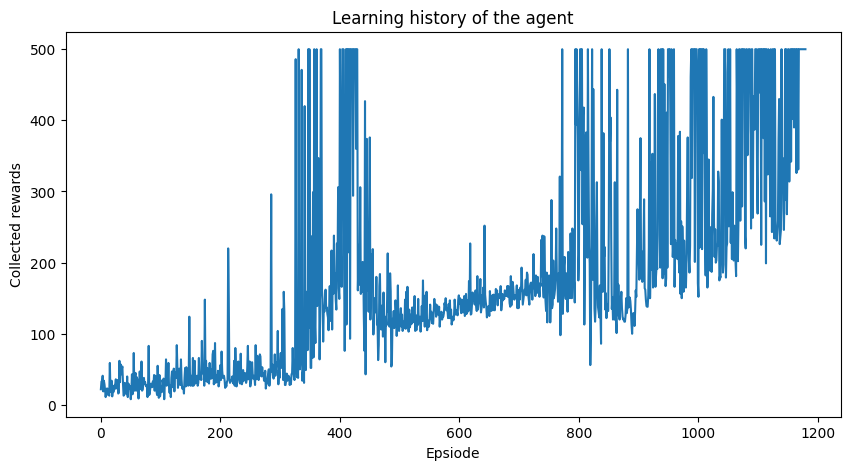

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(episode_reward_history)
plt.xlabel('Epsiode')
plt.ylabel('Collected rewards')
plt.title('Learning history of the agent')
plt.show()

The plot depicts the learning history of an agent in what appears to be a reinforcement learning environment. The x-axis represents the episodes, which typically refer to iterations or rounds of learning that the agent goes through. The y-axis represents the collected rewards, which are the cumulative rewards the agent receives at each episode.

***Key Points***
1. **Early Learning Phase (0-200 episodes):**
   - In the initial episodes, the collected rewards are relatively low and quite erratic. This suggests that the agent is exploring and learning the environment, trying to understand which actions lead to better rewards.

2. **Mid-Learning Phase (200-800 episodes):**
   - Around the 200th episode, there is a noticeable increase in the rewards, with some spikes indicating that the agent has started to discover more optimal strategies. However, there is still significant variability, showing that the agent is balancing exploration and exploitation.

3. **Late Learning Phase (800-1200 episodes):**
   - From about the 800th episode onward, the collected rewards start increasing more consistently. The fluctuations remain, but the general trend shows an improvement in the agent's performance, indicating that it is getting better at optimizing its actions to maximize rewards.

***Summary***

The plot shows the agent's progression from a phase of exploration with low and variable rewards to a more stable phase with higher rewards, suggesting that the agent is learning and improving its strategy over time. The spikes and fluctuations in rewards, particularly in the middle and late stages, might indicate ongoing exploration or changes in the environment or strategy adjustments.

# **Conclusion:**

The project demonstrates the potential benefits of integrating quantum computing with reinforcement learning. The results show that the quantum-enhanced model can achieve similar or better performance compared to classical models, particularly in terms of learning speed and policy optimization. However, the effectiveness of quantum circuits in reinforcement learning depends on the complexity of the environment and the design of the quantum layer. Future work could explore optimizing quantum circuit design and applying this approach to more complex and real-world problems to fully realize the advantages of quantum reinforcement learning.

This structured approach provides a comprehensive view of your project, highlighting its significance and potential contributions to the field of quantum machine learning.